# Decision Tree
1. Widely used for Classification and Regression task
1. It learns a series of if-else leading upto a decision

**Advantages**
1. Simple to understand and to interpret
1. Trees can be visualised
1. Requires little data preparation (i.e data normalisation, dummy variables creation and blank values removal not needed)
1. This module does not support missing values
1. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree
1. Can handle both numerical and categorical data
1. Able to handle multi-output problems
1. Uses a white box model (the explanation for the condition is easily explained by boolean logic)
1. Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

**Disadvantages**
1. Decision-tree learners can create over-complex trees that becomes overfit (Generalization necessary)
1. Decision trees can be unstable because small variations in the data might result in a completely different tree being generated (Ensemble need to be used)
1. NP Complete (Hence Greedy Algo Based)
1. Greedy algorithms cannot guarantee to return the globally optimal decision tree (Ensemble need to be used)
1. XOR, parity & multiplexer hard to learn
1. Decision tree learners create biased trees if some classes dominate (Dataset needs to be balanced)

> http://scikit-learn.org/stable/modules/tree.html#decision-trees

## Strategies to overcome Overfitting
1. **Pre-Pruning**
    1. Stopping the creation of the tree early
    1. Limiting the maximum depth of the tree
    1. Limiting the maximum number of leaves
    1. Requiring a minimum number of points in a node to keep splitting it
    
1. **Post-Pruning**
    1. building the tree but then removing or collapsing nodes that contain little information

> Scikit-Learn only implements pre-pruning, not post-pruning

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

import sys
sys.path.append('../')

from pragmaticml import confusion_matrix

In [2]:
iris_df = pd.read_csv('../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
X = iris_df.iloc[:, :-1]
y = iris_df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [4]:
clf = DecisionTreeClassifier(max_depth = 2)
y_pred = clf.fit(X_train, y_train).predict(X_test)
y_pred

array(['versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor'], dtype=object)

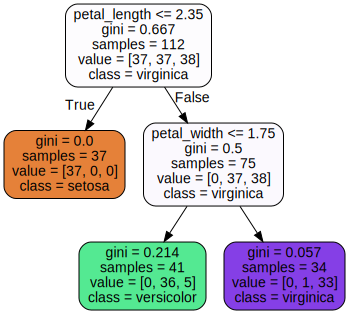

In [5]:
dot_data = export_graphviz(clf, out_file=None,
                         feature_names = iris_df.columns[:-1],
                         class_names = iris_df.species.cat.categories,
                         filled = True, rounded = True)
graph = graphviz.Source(dot_data)
graph

In [6]:
confusion_matrix.show(y_test, y_pred)

,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,13,0
virginica,0,0,12


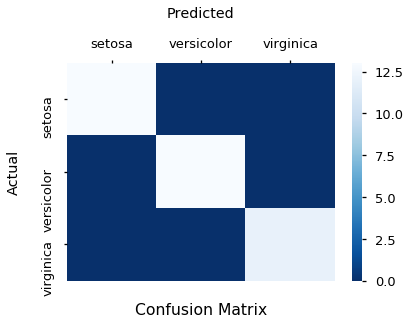

In [7]:
confusion_matrix.visualize(y_test, y_pred)

In [8]:
metrics.accuracy_score(y_test, y_pred)    # Test Set Score

1.0

In [9]:
metrics.accuracy_score(y_train, clf.predict(X_train))    # Training Set Score - if 1 then Model is Overfit

0.9464285714285714

# Judging the Fit
1. **Underfitting** - If both training and test scores are close (i.e. 0.66 & 0.67)
1. **Overfitting** - If training score is higher (i.e. 0.95 >> 0.65)
1. **Generalized** - If both scores are acceptable (i.e. 0.89 > 0.75 or 0.9 < 1)